In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import re
import seaborn as sns

### CO annual emissions (1949-2017)

In [2]:
co_annual = pd.read_csv('data//annual_co2_emissions_per_country.csv')
co_annual.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [3]:
co_annual.drop(['Code'], axis=1, inplace=True)

In [4]:
co_annual = co_annual.rename(columns={'Annual CO₂ emissions (tonnes)':'Annual CO₂', 'Entity':'Country'})

In [5]:
co_annual = co_annual[co_annual.Country != 'World']

In [6]:
#co_annual.Year.unique()
co_annual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20586 entries, 0 to 20852
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     20586 non-null  object 
 1   Year        20586 non-null  int64  
 2   Annual CO₂  20586 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 643.3+ KB


### Annual share of CO per country (1949-2017)

In [7]:
co_share = pd.read_csv('data//annual_share_of_co2_emissions.csv')
co_share.head()

,Entity,Code,Year,Share of global CO₂ emissions (%)
0,Afghanistan,AFG,1949,0.0003
1,Afghanistan,AFG,1950,0.0015
2,Afghanistan,AFG,1951,0.0015
3,Afghanistan,AFG,1952,0.0015
4,Afghanistan,AFG,1953,0.0016


In [8]:
co_share.drop(['Code'], axis=1, inplace=True)

In [9]:
co_share = co_share.rename(columns={'Share of global CO₂ emissions (%)b':'Annual CO₂', 'Entity':'Country'})

In [10]:
co_share.Year.unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758,
       1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769,
       1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780,
       1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791,
       1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802,
       1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813,
       1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824,
       1825, 1826, 1827, 1828, 1829, 1830, 1831, 18

In [11]:
co_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20586 entries, 0 to 20585
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            20586 non-null  object 
 1   Year                               20586 non-null  int64  
 2   Share of global CO₂ emissions (%)  20586 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 482.6+ KB


### CO Emissions per capita (1800-2017) (no using it for now)

In [12]:
co_per_c = pd.read_csv("data//co_emissions_per_capita.csv")
co_per_c.head()


,Entity,Code,Year,Per capita CO₂ emissions (tonnes per capita)
0,Afghanistan,AFG,1800,0.0
1,Afghanistan,AFG,1801,0.0
2,Afghanistan,AFG,1802,0.0
3,Afghanistan,AFG,1803,0.0
4,Afghanistan,AFG,1804,0.0


In [13]:
co_per_c.drop(['Code'], axis=1, inplace=True)

In [14]:
co_per_c = co_per_c.rename(columns={'Per capita CO₂ emissions (tonnes per capita)':'CO₂', 'Entity':'Country'})

In [15]:
co_per_c.head()

,Country,Year,CO₂
0,Afghanistan,1800,0.0
1,Afghanistan,1801,0.0
2,Afghanistan,1802,0.0
3,Afghanistan,1803,0.0
4,Afghanistan,1804,0.0


In [16]:
co_per_c = co_per_c[co_per_c.Country != 'World']

In [17]:
#co_per_c.Country.unique()

In [18]:
#co_per_c.Year.unique()
co_per_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42723 entries, 0 to 42843
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  42723 non-null  object 
 1   Year     42723 non-null  int64  
 2   CO₂      42723 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


### Annual CO emissions globally 

In [301]:
data = pd.read_csv('data//annual-co-emissions-by-region.csv')
data.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [302]:
global_co = data[data.Entity == 'World']
global_co.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
20353,World,OWID_WRL,1751,9350528.0
20354,World,OWID_WRL,1752,9354192.0
20355,World,OWID_WRL,1753,9354192.0
20356,World,OWID_WRL,1754,9357856.0
20357,World,OWID_WRL,1755,9361520.0


In [303]:
global_co.drop(['Entity','Code'], axis=1, inplace=True)

C:\Users\Andreu\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [304]:
global_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 20353 to 20619
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            267 non-null    int64  
 1   Annual CO₂ emissions (tonnes )  267 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.3 KB


###  Total greenhouse gas emissions (1990-2016)

In [19]:
ghg = pd.read_csv('data//total-ghg-emissions.csv')
ghg.head()

,Entity,Code,Year,Total GHG emissions including LUCF (tonnes CO₂e)
0,Afghanistan,AFG,1990,15140000.0
1,Afghanistan,AFG,1991,15060000.0
2,Afghanistan,AFG,1992,13600000.0
3,Afghanistan,AFG,1993,13430000.0
4,Afghanistan,AFG,1994,13240000.0


In [20]:
ghg.drop(['Code'], axis=1, inplace=True)

In [21]:
ghg = ghg.rename(columns={'Total GHG emissions including LUCF (tonnes CO₂e)':'GHG(tonnes CO₂e )', 'Entity':'Country'})

In [22]:
ghg = ghg[ghg.Country != 'World']

In [23]:
ghg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5183
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            5157 non-null   object 
 1   Year               5157 non-null   int64  
 2   GHG(tonnes CO₂e )  5157 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.2+ KB


### Global CO₂ atmospheric concentration

In [165]:
co_concentration = pd.read_csv('data//global-co-concentration-ppm.csv')
co_concentration

,Entity,Code,Year,CO₂ concentration (parts per million)
0,World,OWID_WRL,803719 BCE,207.29
1,World,OWID_WRL,803182 BCE,202.23
2,World,OWID_WRL,802573 BCE,204.86
3,World,OWID_WRL,802060 BCE,207.50
4,World,OWID_WRL,801975 BCE,202.92
...,...,...,...,...
1866,World,OWID_WRL,2014,398.65
1867,World,OWID_WRL,2015,400.83
1868,World,OWID_WRL,2016,404.24
1869,World,OWID_WRL,2017,406.55


In [167]:
co_concentration.drop(['Code', 'Entity'], axis=1, inplace=True)

In [168]:
co_concentration = co_concentration.rename(columns={'CO₂ concentration (parts per million)':'CO₂ concentration'})

In [214]:
co_concentration.Year[1740]

'1846'

Text(0, 0.5, 'CO atmospheric concentration')

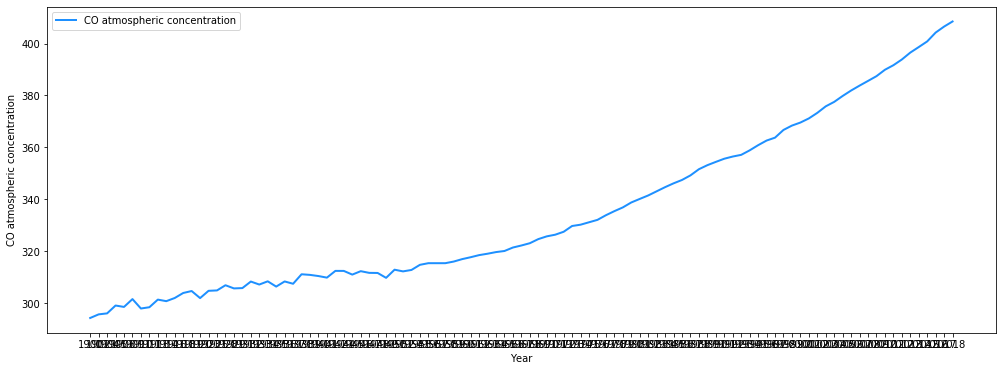

In [170]:
x = co_concentration.Year[1768:]
y = co_concentration['CO₂ concentration'][1768:]
plt.figure(figsize=(17,6))

plt.plot(x, y, 'dodgerblue', label='CO atmospheric concentration', 
         linewidth=2)

plt.legend()
plt.xlabel('Year')
plt.ylabel('CO atmospheric concentration')

In [172]:
co_concentration.head()

,Year,CO₂ concentration
0,803719 BCE,207.29
1,803182 BCE,202.23
2,802573 BCE,204.86
3,802060 BCE,207.50
4,801975 BCE,202.92


### Global temperatures by country

In [29]:
temperature = pd.read_csv('data//GlobalLandTemperaturesByCountry.csv')

In [30]:
temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [31]:
temperature['dt']= pd.to_datetime(temperature['dt']) 

In [115]:
temperature['Year'] = pd.DatetimeIndex(temperature['dt']).year
temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,Year
3239,1838-04-01,13.008,2.586,Afghanistan,1838,1838
3240,1838-05-01,NaN,NaN,Afghanistan,1838,1838
3241,1838-06-01,23.950,2.510,Afghanistan,1838,1838
3242,1838-07-01,26.877,2.883,Afghanistan,1838,1838
3243,1838-08-01,24.938,2.992,Afghanistan,1838,1838


In [116]:
temperature.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua And Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia'

In [117]:
non_wanted = ['Åland','Africa','Asia','Baker Island','Denmark','Federated States Of Micronesia','France', 'French Guiana', 'French Polynesia',
            'French Southern And Antarctic Lands','Gaza Strip','Guadeloupe', 'Guam','Guernsey','Heard Island And Mcdonald Islands','Isle Of Man','Jersey','Kingman Reef',
             'Montserrat','Netherlands (Europe)','Niue','North America','New Caledonia','Northern Mariana Islands','Oceania',
             'Palmyra Atoll','Saint Barthélemy','American Samoa','South America','South Georgia And The South Sandwich Isla',
             'Svalbard And Jan Mayen','Turks And Caicas Islands','United Kingdom','Western Sahara']
for region in non_wanted:
    temperature = temperature[temperature.Country != region]

In [118]:
annual_temp = temperature[['year', 'Country','AverageTemperature']].groupby(['year','Country']).agg({'AverageTemperature':'mean'})
annual_temp.head()

AverageTemperature
year Country                    
1743 Albania               8.620
     Andorra               7.556
     Austria               2.482
     Belarus               0.767
     Belgium               7.106

In [119]:
annual_temp.reset_index(level=0, inplace=True)

In [120]:
annual_temp.head()

,year,AverageTemperature
Country,,
Albania,1743,8.620
Andorra,1743,7.556
Austria,1743,2.482
Belarus,1743,0.767
Belgium,1743,7.106


In [121]:
annual_temp.reset_index(level=0, inplace=True)

In [122]:
annual_temp.head()

,Country,year,AverageTemperature
0,Albania,1743,8.620
1,Andorra,1743,7.556
2,Austria,1743,2.482
3,Belarus,1743,0.767
4,Belgium,1743,7.106


In [123]:
annual_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41931 entries, 0 to 41930
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             41931 non-null  object 
 1   year                41931 non-null  int64  
 2   AverageTemperature  39793 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 982.9+ KB


### Global Temperature anomaly 1850-2018


In [41]:
temperature_a = pd.read_csv('data//temperature_anomaly.csv')
temperature_a.head()

,Entity,Code,Year,Median (℃),Upper (℃),Lower (℃)
0,Global,NaN,1850,-0.373,-0.339,-0.425
1,Global,NaN,1851,-0.218,-0.184,-0.274
2,Global,NaN,1852,-0.228,-0.196,-0.280
3,Global,NaN,1853,-0.269,-0.239,-0.321
4,Global,NaN,1854,-0.248,-0.218,-0.301


In [42]:
temperature_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entity      676 non-null    object 
 1   Code        0 non-null      float64
 2   Year        676 non-null    int64  
 3   Median (℃)  676 non-null    float64
 4   Upper (℃)   676 non-null    float64
 5   Lower (℃)   676 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 31.8+ KB


In [43]:
temperature_a.drop(['Code'], axis=1, inplace=True)

In [44]:
temperature_a.rename(columns={'Entity':'Country'}, inplace=True)

In [45]:
temperature_a.Country.unique()

array(['Global', 'Northern Hemisphere', 'Southern Hemisphere', 'Tropics'],
      dtype=object)

In [46]:
temperature_a.Year.unique()

array([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 20

Text(0, 0.5, 'increse ordescrease in Temperature(℃)')

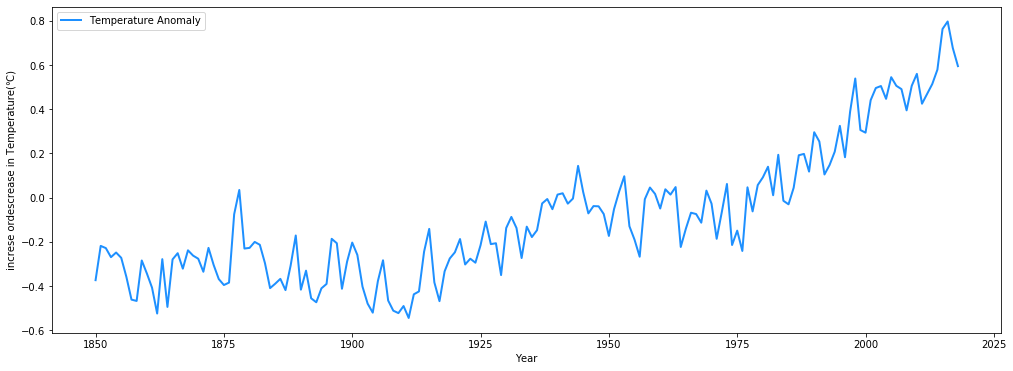

In [74]:

x = temperature_a.Year
y = temperature_a['Median (℃)'].where(temperature_a['Country']=='Global')
plt.figure(figsize=(17,6))

plt.plot(x, y, 'dodgerblue', label='Temperature Anomaly', 
         linewidth=2)

plt.legend()
plt.xlabel('Year')
plt.ylabel('increse ordescrease in Temperature(℃)')

In [64]:
temperature_a.head()

,Country,Year,Median (℃),Upper (℃),Lower (℃)
0,Global,1850,-0.373,-0.339,-0.425
1,Global,1851,-0.218,-0.184,-0.274
2,Global,1852,-0.228,-0.196,-0.280
3,Global,1853,-0.269,-0.239,-0.321
4,Global,1854,-0.248,-0.218,-0.301


In [270]:
global_a = temperature_a.where(temperature_a['Country']=='Global')
global_a.dropna(inplace=True)
global_a

,Country,Year,Median (℃),Upper (℃),Lower (℃)
0,Global,1850.0,-0.373,-0.339,-0.425
1,Global,1851.0,-0.218,-0.184,-0.274
2,Global,1852.0,-0.228,-0.196,-0.280
3,Global,1853.0,-0.269,-0.239,-0.321
4,Global,1854.0,-0.248,-0.218,-0.301
...,...,...,...,...,...
164,Global,2014.0,0.579,0.616,0.545
165,Global,2015.0,0.763,0.802,0.730
166,Global,2016.0,0.797,0.835,0.762
167,Global,2017.0,0.677,0.716,0.636


### Ozone depletion crisis

In [184]:
ozone = pd.read_csv('data//ozone-depleting-substance-emissions.csv')
ozone.head()

,Entity,Code,Year,Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)
0,Natural emissions,NaN,1961,165000
1,Natural emissions,NaN,1962,165000
2,Natural emissions,NaN,1963,165000
3,Natural emissions,NaN,1964,165000
4,Natural emissions,NaN,1965,165000


In [185]:
ozone.drop(['Code'], axis=1, inplace=True)

In [186]:
ozone.rename(columns={'Ozone-depleting substance emissions (Scientific Assessment 2014) (tonnes CFC11-equivalents)':'Ozone-depleting emissions'}, inplace=True)

In [187]:
ozone.Entity.unique()

array(['Natural emissions', 'Total emissions'], dtype=object)

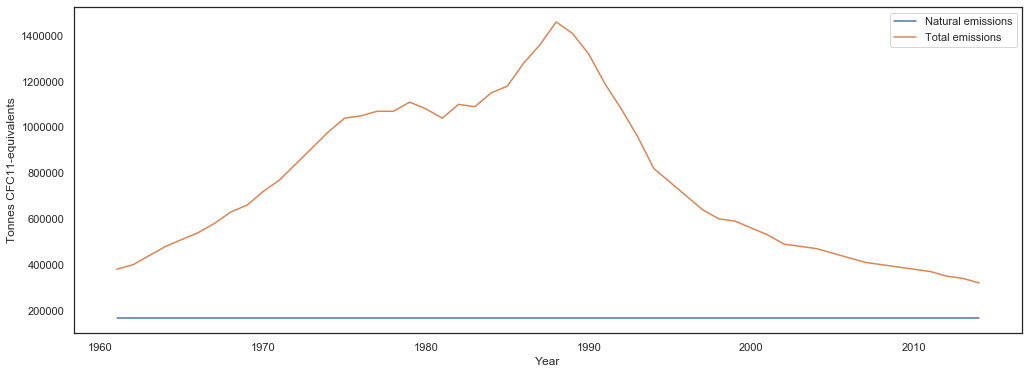

In [188]:
plt.figure(figsize=(17,6))
plt.plot(ozone.Year,ozone['Ozone-depleting emissions'].where(ozone['Entity']=='Natural emissions'), label='Natural emissions')
plt.xlabel('Year')
plt.ylabel('Tonnes CFC11-equivalents')
plt.plot(ozone.Year, ozone['Ozone-depleting emissions'].where(ozone['Entity']=='Total emissions'), label='Total emissions')
plt.legend(['Natural emissions', 'Total emissions'], loc='upper right')

In [84]:
ozone.head()

,Entity,Year,Ozone-depleting emissions
0,Natural emissions,1961,165000
1,Natural emissions,1962,165000
2,Natural emissions,1963,165000
3,Natural emissions,1964,165000
4,Natural emissions,1965,165000


### GDP per capita (1981-2018)

In [95]:
gdp = pd.read_csv('data//GDP_P.csv')
gdp.head()

,Unnamed: 0,Country,Year,GDP,Population,GDP_per_capita
0,0,Canada,1981,808.688171,24900000.0,32477.436602
1,1,United States,1981,6698.570801,229465714.0,29192.033459
2,2,Cuba,1981,35.882641,9705971.0,3696.965594
3,3,Mexico,1981,589.548950,69930971.0,8430.441359
4,4,Antigua Barbuda,1981,0.408927,68264.0,5990.381182


In [129]:
gdp.drop(['Unnamed: 0'],axis=1, inplace=True)

### Tertiary education (1970-2010)

In [96]:
education = pd.read_csv('data//education_df.csv')
education.head()

,Unnamed: 0,Country,Year,Tertiary_education
0,0,Afghanistan,1970,1.08
1,1,Afghanistan,1975,1.48
2,2,Afghanistan,1980,1.96
3,3,Afghanistan,1985,2.49
4,4,Afghanistan,1990,2.91


In [130]:
education.drop(['Unnamed: 0'],axis=1, inplace=True)

### Global average temperature

In [197]:
global_temperature = pd.read_csv('data//GlobalTemperatures.csv')
global_temperature.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
global_temperature.dropna(inplace=True)
global_temperature = global_temperature[['dt','LandAverageTemperature','LandAndOceanAverageTemperature']]
global_temperature.head()

,dt,LandAverageTemperature,LandAndOceanAverageTemperature
1200,1850-01-01,0.749,12.833
1201,1850-02-01,3.071,13.588
1202,1850-03-01,4.954,14.043
1203,1850-04-01,7.217,14.667
1204,1850-05-01,10.004,15.507


In [199]:
#global_temperature['dt']= pd.to_datetime(global_temperature['dt']) 
global_temperature['Year'] = pd.DatetimeIndex(global_temperature['dt']).year
global_temperature.head()

,dt,LandAverageTemperature,LandAndOceanAverageTemperature,Year
1200,1850-01-01,0.749,12.833,1850
1201,1850-02-01,3.071,13.588,1850
1202,1850-03-01,4.954,14.043,1850
1203,1850-04-01,7.217,14.667,1850
1204,1850-05-01,10.004,15.507,1850


In [200]:
annual_global_temp = global_temperature[['Year','LandAverageTemperature','LandAndOceanAverageTemperature']].groupby(['Year']).agg({'LandAverageTemperature':'mean',
                                                                                                                                  'LandAndOceanAverageTemperature':'mean'})
annual_global_temp.head()

,LandAverageTemperature,LandAndOceanAverageTemperature
Year,,
1850,7.900667,14.867167
1851,8.178583,14.991833
1852,8.100167,15.006500
1853,8.041833,14.955167
1854,8.210500,14.991000


In [202]:
annual_global_temp.reset_index(level=0, inplace=True)
annual_global_temp.head()

,index,Year,LandAverageTemperature,LandAndOceanAverageTemperature
0,0,1850,7.900667,14.867167
1,1,1851,8.178583,14.991833
2,2,1852,8.100167,15.006500
3,3,1853,8.041833,14.955167
4,4,1854,8.210500,14.991000


In [203]:
annual_global_temp.drop(['index'], axis=1, inplace=True)

In [204]:
annual_global_temp.head()

,Year,LandAverageTemperature,LandAndOceanAverageTemperature
0,1850,7.900667,14.867167
1,1851,8.178583,14.991833
2,1852,8.100167,15.006500
3,1853,8.041833,14.955167
4,1854,8.210500,14.991000


In [228]:
annual_global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            166 non-null    int64  
 1   LandAverageTemperature          166 non-null    float64
 2   LandAndOceanAverageTemperature  166 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.0 KB


## Merging datasets

### CO merged 

In [147]:
co_merged = pd.merge(co_annual, co_share, on=['Country','Year'])
co_merged.head()

,Country,Year,Annual CO₂,Share of global CO₂ emissions (%)
0,Afghanistan,1949,14656.0,0.0003
1,Afghanistan,1950,84272.0,0.0015
2,Afghanistan,1951,91600.0,0.0015
3,Afghanistan,1952,91600.0,0.0015
4,Afghanistan,1953,106256.0,0.0016


In [98]:
co_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20586 entries, 0 to 20585
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            20586 non-null  object 
 1   Year                               20586 non-null  int64  
 2   Annual CO₂                         20586 non-null  float64
 3   Share of global CO₂ emissions (%)  20586 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 804.1+ KB


### total emissions (1990-2016)

In [107]:
ghg.head()

,Country,Year,GHG(tonnes CO₂e )
0,Afghanistan,1990,15140000.0
1,Afghanistan,1991,15060000.0
2,Afghanistan,1992,13600000.0
3,Afghanistan,1993,13430000.0
4,Afghanistan,1994,13240000.0


In [109]:
total_emissions = pd.merge(co_merged,ghg, on=(['Country','Year']))
total_emissions.head()

,Country,Year,Annual CO₂,Share of global CO₂ emissions (%),GHG(tonnes CO₂e )
0,Afghanistan,1990,2602407.59,0.0117,15140000.0
1,Afghanistan,1991,2426486.16,0.0108,15060000.0
2,Afghanistan,1992,1381521.84,0.0062,13600000.0
3,Afghanistan,1993,1333837.11,0.0060,13430000.0
4,Afghanistan,1994,1282488.38,0.0057,13240000.0


In [112]:
total_emissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5074 entries, 0 to 5073
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            5074 non-null   object 
 1   Year                               5074 non-null   int64  
 2   Annual CO₂                         5074 non-null   float64
 3   Share of global CO₂ emissions (%)  5074 non-null   float64
 4   GHG(tonnes CO₂e )                  5074 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 237.8+ KB


### Merging Temperature with Emissions (1990-2013)

In [126]:
annual_temp.head()

,Country,Year,AverageTemperature
0,Albania,1743,8.620
1,Andorra,1743,7.556
2,Austria,1743,2.482
3,Belarus,1743,0.767
4,Belgium,1743,7.106


In [127]:
annual_temp.rename(columns={'year':'Year'}, inplace=True)

In [128]:
co_impact = pd.merge(total_emissions, annual_temp, on=(['Country','Year']))
co_impact.head()

,Country,Year,Annual CO₂,Share of global CO₂ emissions (%),GHG(tonnes CO₂e ),AverageTemperature
0,Afghanistan,1990,2602407.59,0.0117,15140000.0,14.993333
1,Afghanistan,1991,2426486.16,0.0108,15060000.0,14.370750
2,Afghanistan,1992,1381521.84,0.0062,13600000.0,14.056083
3,Afghanistan,1993,1333837.11,0.0060,13430000.0,14.439250
4,Afghanistan,1994,1282488.38,0.0057,13240000.0,14.754750


### Merging co_impact  with demographic and economic indicators

In [149]:
indicators_merged = pd.merge(co_impact,gdp, on=(['Country','Year']))
indicators_merged.head()

,Country,Year,Annual CO₂,Share of global CO₂ emissions (%),GHG(tonnes CO₂e ),AverageTemperature,GDP,Population,GDP_per_capita
0,Afghanistan,1990,2602407.59,0.0117,15140000.0,14.993333,4.592665,13568282.0,338.485353
1,Afghanistan,1991,2426486.16,0.0108,15060000.0,14.370750,4.629406,13671918.0,338.606915
2,Afghanistan,1992,1381521.84,0.0062,13600000.0,14.056083,4.675700,15023317.0,311.229518
3,Afghanistan,1993,1333837.11,0.0060,13430000.0,14.439250,4.530753,17003437.0,266.461018
4,Afghanistan,1994,1282488.38,0.0057,13240000.0,14.754750,4.394831,18486041.0,237.737799


In [145]:
indicators_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3663 entries, 0 to 3662
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            3663 non-null   object 
 1   Year                               3663 non-null   int64  
 2   Annual CO₂                         3663 non-null   float64
 3   Share of global CO₂ emissions (%)  3663 non-null   float64
 4   GHG(tonnes CO₂e )                  3663 non-null   float64
 5   AverageTemperature                 3663 non-null   float64
 6   GDP                                3663 non-null   float64
 7   Population                         3663 non-null   float64
 8   GDP_per_capita                     3663 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 286.2+ KB


In [141]:
indicators_merged_outer = pd.merge(co_impact,gdp, on=(['Country','Year']), how='outer')
indicators_merged_outer.head()

,Country,Year,Annual CO₂,Share of global CO₂ emissions (%),GHG(tonnes CO₂e ),AverageTemperature,GDP,Population,GDP_per_capita
0,Afghanistan,1990,2602407.59,0.0117,15140000.0,14.993333,4.592665,13568282.0,338.485353
1,Afghanistan,1991,2426486.16,0.0108,15060000.0,14.370750,4.629406,13671918.0,338.606915
2,Afghanistan,1992,1381521.84,0.0062,13600000.0,14.056083,4.675700,15023317.0,311.229518
3,Afghanistan,1993,1333837.11,0.0060,13430000.0,14.439250,4.530753,17003437.0,266.461018
4,Afghanistan,1994,1282488.38,0.0057,13240000.0,14.754750,4.394831,18486041.0,237.737799


In [152]:
indicators_merged_outer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7131 entries, 0 to 7130
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            7131 non-null   object 
 1   Year                               7131 non-null   int64  
 2   Annual CO₂                         4030 non-null   float64
 3   Share of global CO₂ emissions (%)  4030 non-null   float64
 4   GHG(tonnes CO₂e )                  4030 non-null   float64
 5   AverageTemperature                 4030 non-null   float64
 6   GDP                                6764 non-null   float64
 7   Population                         6764 non-null   float64
 8   GDP_per_capita                     6764 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 557.1+ KB


### Merging global co concentration, temp anomally and annual_global_temp

In [231]:
annual_global_temp.head()

,Year,LandAverageTemperature,LandAndOceanAverageTemperature
0,1850,7.900667,14.867167
1,1851,8.178583,14.991833
2,1852,8.100167,15.006500
3,1853,8.041833,14.955167
4,1854,8.210500,14.991000


In [232]:
annual_global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            166 non-null    int64  
 1   LandAverageTemperature          166 non-null    float64
 2   LandAndOceanAverageTemperature  166 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.0 KB


In [233]:
co_concentration.head()

,Year,CO₂ concentration
0,803719 BCE,207.29
1,803182 BCE,202.23
2,802573 BCE,204.86
3,802060 BCE,207.50
4,801975 BCE,202.92


In [234]:
co_concentration_modern = co_concentration[1740:]
co_concentration_modern.head()

,Year,CO₂ concentration
1740,1846,283.62
1741,1847,286.84
1742,1850,284.00
1743,1851,287.13
1744,1854,288.05


In [235]:
co_concentration_modern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 1740 to 1870
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               131 non-null    object 
 1   CO₂ concentration  131 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [236]:
co_concentration_modern["Year"] = co_concentration_modern["Year"].astype(int)

C:\Users\Andreu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [237]:
co_concentration_modern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 1740 to 1870
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               131 non-null    int32  
 1   CO₂ concentration  131 non-null    float64
dtypes: float64(1), int32(1)
memory usage: 1.7 KB


In [265]:
co_global_impact = pd.merge(annual_global_temp,co_concentration_modern, on='Year')
co_global_impact.head()

,Year,LandAverageTemperature,LandAndOceanAverageTemperature,CO₂ concentration
0,1850,7.900667,14.867167,284.00
1,1851,8.178583,14.991833,287.13
2,1854,8.210500,14.991000,288.05
3,1855,8.110750,15.021083,285.57
4,1857,7.758167,14.758250,283.16


In [240]:
co_global_impact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            126 non-null    int64  
 1   LandAverageTemperature          126 non-null    float64
 2   LandAndOceanAverageTemperature  126 non-null    float64
 3   CO₂ concentration               126 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 4.9 KB


In [273]:
co_impact_temp = pd.merge(co_global_impact,global_a, on='Year')

In [274]:
co_impact_temp.drop(['Country'], axis=1, inplace=True)

In [275]:
co_impact_temp.head()

,Year,LandAverageTemperature,LandAndOceanAverageTemperature,CO₂ concentration,Median (℃),Upper (℃),Lower (℃)
0,1850,7.900667,14.867167,284.00,-0.373,-0.339,-0.425
1,1851,8.178583,14.991833,287.13,-0.218,-0.184,-0.274
2,1854,8.210500,14.991000,288.05,-0.248,-0.218,-0.301
3,1855,8.110750,15.021083,285.57,-0.272,-0.241,-0.324
4,1857,7.758167,14.758250,283.16,-0.461,-0.431,-0.512


In [299]:
global_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 20353 to 20619
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            267 non-null    object 
 1   Annual CO₂ emissions (tonnes )  267 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [308]:
co_temp_global = pd.merge(co_impact_temp,global_co, on='Year')
co_temp_global.head()

,Year,LandAverageTemperature,LandAndOceanAverageTemperature,CO₂ concentration,Median (℃),Upper (℃),Lower (℃),Annual CO₂ emissions (tonnes )
0,1850,7.900667,14.867167,284.00,-0.373,-0.339,-0.425,196896032.0
1,1851,8.178583,14.991833,287.13,-0.218,-0.184,-0.274,198742688.0
2,1854,8.210500,14.991000,288.05,-0.248,-0.218,-0.301,255010736.0
3,1855,8.110750,15.021083,285.57,-0.272,-0.241,-0.324,260034080.0
4,1857,7.758167,14.758250,283.16,-0.461,-0.431,-0.512,279680448.0


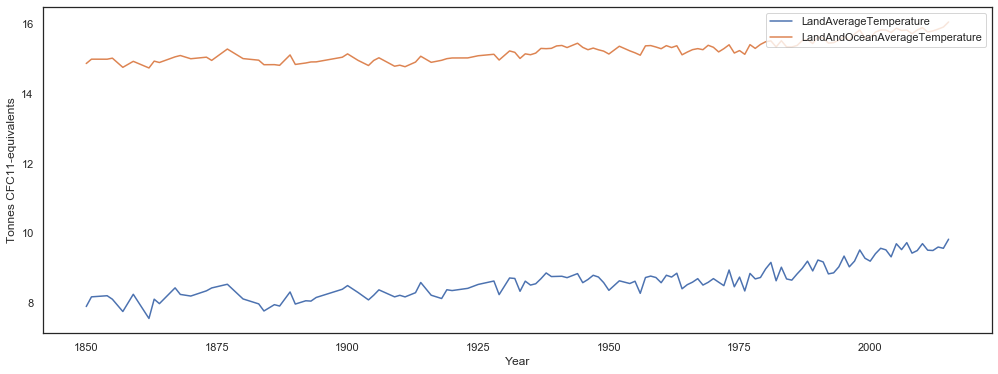

In [241]:
plt.figure(figsize=(17,6))
plt.plot(co_global_impact.Year,co_global_impact['LandAverageTemperature'], label='LandAverageTemperature')
plt.xlabel('Year')
plt.ylabel('Tonnes CFC11-equivalents')
plt.plot(co_global_impact.Year,co_global_impact['LandAndOceanAverageTemperature'], label='LandAndOceanAverageTemperature')
plt.legend(['LandAverageTemperature', 'LandAndOceanAverageTemperature'], loc='upper right')

In [307]:
co_conc_temp_corr = co_global_impact["LandAverageTemperature"].corr(co_global_impact["CO₂ concentration"])
co_conc_temp_corr

0.9149133329199667

In [310]:
co_temp_corr = co_temp_global["LandAverageTemperature"].corr(co_temp_global["Annual CO₂ emissions (tonnes )"])
co_temp_corr

0.8796467057646229

In [257]:
co_global_impact["Year"] = co_global_impact["Year"].astype(str)

C:\Users\Andreu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Andreu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Andreu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Andreu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0, flags=flags)


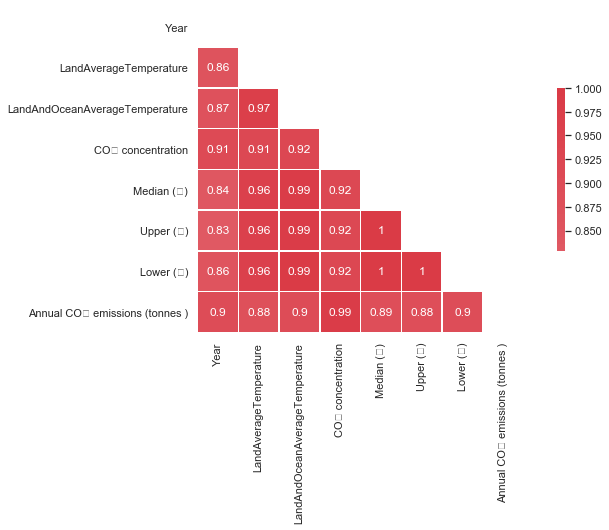

In [311]:
corr = co_temp_global.corr()
plt.figure(figsize=(12, 6))
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [312]:
co_temp_global.head()

,Year,LandAverageTemperature,LandAndOceanAverageTemperature,CO₂ concentration,Median (℃),Upper (℃),Lower (℃),Annual CO₂ emissions (tonnes )
0,1850,7.900667,14.867167,284.00,-0.373,-0.339,-0.425,196896032.0
1,1851,8.178583,14.991833,287.13,-0.218,-0.184,-0.274,198742688.0
2,1854,8.210500,14.991000,288.05,-0.248,-0.218,-0.301,255010736.0
3,1855,8.110750,15.021083,285.57,-0.272,-0.241,-0.324,260034080.0
4,1857,7.758167,14.758250,283.16,-0.461,-0.431,-0.512,279680448.0


In [322]:
co_temp_global_no_colin = co_temp_global.drop(['LandAndOceanAverageTemperature','Upper (℃)','Lower (℃)'], axis=1)
co_temp_global_no_colin.head()

,Year,LandAverageTemperature,CO₂ concentration,Median (℃),Annual CO₂ emissions (tonnes )
0,1850,7.900667,284.00,-0.373,196896032.0
1,1851,8.178583,287.13,-0.218,198742688.0
2,1854,8.210500,288.05,-0.248,255010736.0
3,1855,8.110750,285.57,-0.272,260034080.0
4,1857,7.758167,283.16,-0.461,279680448.0


In [324]:
co_temp_global_no_colin["Year"] = co_temp_global_no_colin["Year"].astype(str)

C:\Users\Andreu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Andreu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\Andreu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Andreu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0, flags=flags)


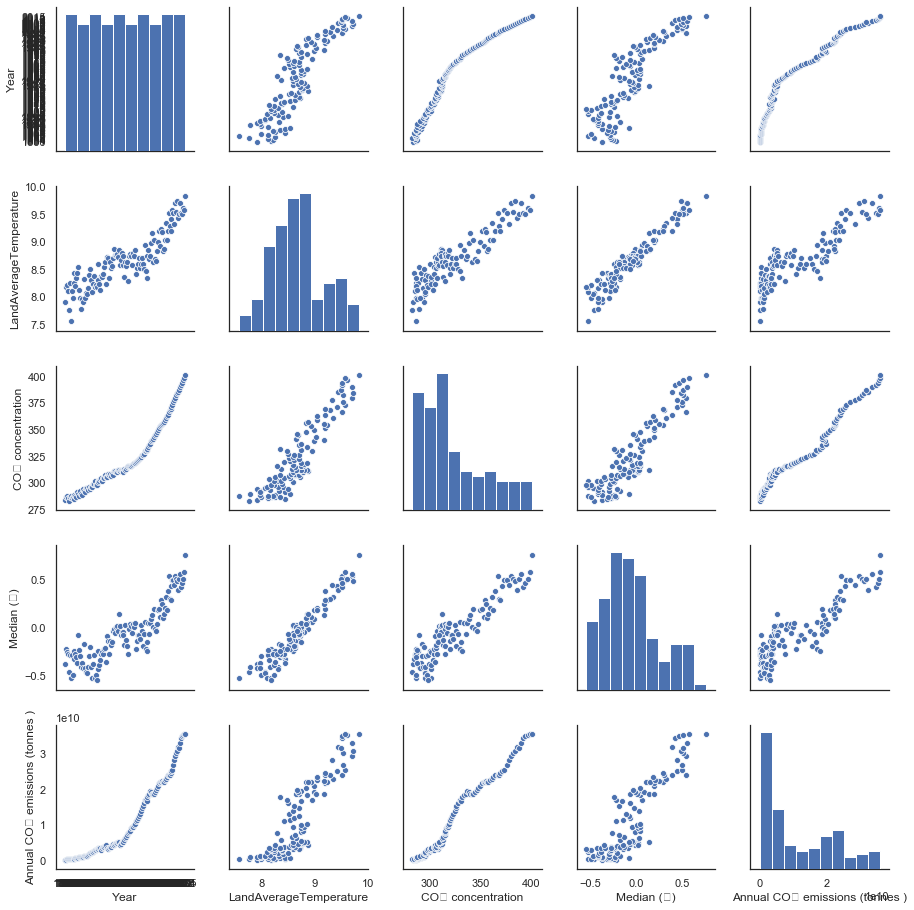

In [325]:
sns.pairplot(co_temp_global_no_colin)

Text(0, 0.5, 'Median (℃)')

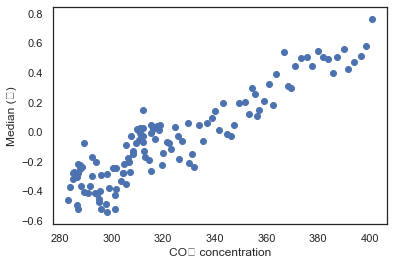

In [317]:
plt.scatter(x=co_temp_global['CO₂ concentration'], y=co_temp_global['Median (℃)'])
plt.xlabel('CO₂ concentration')
plt.ylabel('Median (℃)')

Text(0, 0.5, 'Median (℃)')

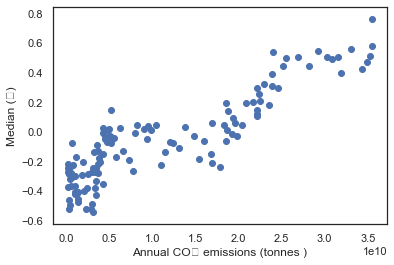

In [318]:
plt.scatter(x=co_temp_global['Annual CO₂ emissions (tonnes )'], y=co_temp_global['Median (℃)'])
plt.xlabel('Annual CO₂ emissions (tonnes )')
plt.ylabel('Median (℃)')

### Checking Correlations

In [250]:
indicators_merged.head()

,Country,Year,Annual CO₂,Share of global CO₂ emissions (%),GHG(tonnes CO₂e ),AverageTemperature,GDP,Population,GDP_per_capita
0,Afghanistan,1990,2602407.59,0.0117,15140000.0,14.993333,4.592665,13568282.0,338.485353
1,Afghanistan,1991,2426486.16,0.0108,15060000.0,14.370750,4.629406,13671918.0,338.606915
2,Afghanistan,1992,1381521.84,0.0062,13600000.0,14.056083,4.675700,15023317.0,311.229518
3,Afghanistan,1993,1333837.11,0.0060,13430000.0,14.439250,4.530753,17003437.0,266.461018
4,Afghanistan,1994,1282488.38,0.0057,13240000.0,14.754750,4.394831,18486041.0,237.737799


In [252]:
indicators_merged["Year"] = indicators_merged["Year"].astype(str)

In [253]:
indicators_merged.corr()

,Annual CO₂,Share of global CO₂ emissions (%),GHG(tonnes CO₂e ),AverageTemperature,GDP,Population,GDP_per_capita
Annual CO₂,1.000000,0.985708,0.971729,-0.224929,0.838600,0.676094,0.150583
Share of global CO₂ emissions (%),0.985708,1.000000,0.957867,-0.234563,0.836888,0.666555,0.154708
GHG(tonnes CO₂e ),0.971729,0.957867,1.000000,-0.193602,0.791603,0.724891,0.109097
AverageTemperature,-0.224929,-0.234563,-0.193602,1.000000,-0.208351,-0.068548,-0.386509
GDP,0.838600,0.836888,0.791603,-0.208351,1.000000,0.376620,0.304585
Population,0.676094,0.666555,0.724891,-0.068548,0.376620,1.000000,-0.048032
GDP_per_capita,0.150583,0.154708,0.109097,-0.386509,0.304585,-0.048032,1.000000


In [255]:
ind_no_colin = indicators_merged.drop(['Share of global CO₂ emissions (%)','GDP','Annual CO₂'], axis=1)

In [262]:
indicators_merged.columns

Index(['Country', 'Year', 'Annual CO₂', 'Share of global CO₂ emissions (%)',
       'GHG(tonnes CO₂e )', 'AverageTemperature', 'GDP', 'Population',
       'GDP_per_capita'],
      dtype='object')

In [264]:
temp_ghg_corr = indicators_merged["GDP_per_capita"].corr(indicators_merged["GHG(tonnes CO₂e )"])
temp_ghg_corr

0.10909684577014037

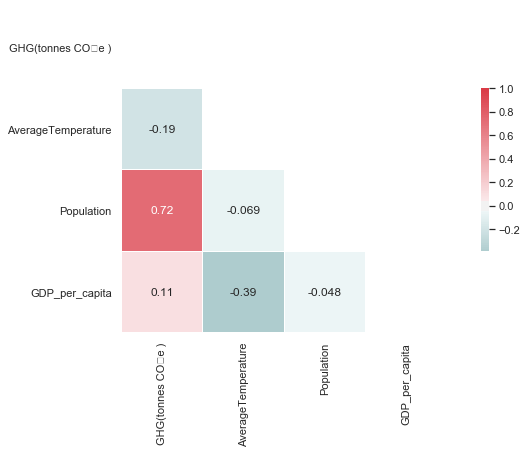

In [256]:
# here we are using seaborn to show the heatmap of the correlation between our final datasets' parameters
corr = ind_no_colin.corr()
plt.figure(figsize=(12, 6))
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()